<a href="https://colab.research.google.com/github/lrburle/ML_Assignment1/blob/master/assignment1_LandonBurleson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 - Landon Burleson - Fall 2022

This assigment is used to demonstrate a basic Linear Regression model for various data sets. 

In [136]:
!git clone https://github.com/lrburle/ML_Assignment1.git

fatal: destination path 'ML_Assignment1' already exists and is not an empty directory.


Shown below are the necessary imports needed for the assignment. 

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import csv

The below code is used for the top level class of the assignment:

In [138]:
class assign1:
        def __init__(self):
                self.a = 0.3 #Learning rate

                #Basis Function Variables
                self.mu = 0 #Mean Value
                self.phi = 1 #Variance
        
        def init_theta(self, m, n):
                self.theta = np.random.random((m, n))

        def hypothesis(self, xdata):
                y = np.dot(self.theta, xdata)
                return y

        def costFunction(self, xdata, ydata):
                [m, n] = xdata.shape

                sum = 0
                for i in range(m):
                        sum += (self.hypothesis(xdata[i])-ydata[i])**2
                costf = (1/m) * sum

                return costf

        def gradientDescent(self, xdata, ydata):
                [m, n] = xdata.shape

                theta_new = self.theta.copy()

                for j in range(n):
                        sum = 0 
                        for i in range(m):
                                sum += (self.hypothesis(xdata[i]) - ydata[i]) * xdata[i, j]

                        theta_new[0, j] = self.theta[0, j] - self.a * (1 / m) * sum
                
                self.theta = theta_new 

	#Used to modifify the input data appropriately
        def sigmoidBasis(self, data):
                [m,n] = data.shape
                out = np.zeros((m, 1))
                out[:,0] = np.exp(((data[:, 0] - self.mu) ** 2) / (2*self.phi**2)) 
                return np.concatenate((data, out), axis=1)

        def polynomialBasis(self, data, order):
                [m,n] = data.shape
                out = np.zeros((m, 1))
                out[:,0] = data[:, 0] ** order
                return np.concatenate((data, out), axis=1) 
        
        def concatOnes(self, data):
                [m,n] = data.shape
                out = np.ones((m, 1))
                return np.concatenate((out, data), axis=1)
        
        #Parses the csv data for question 2
        def csvParse(self, csvFile):
                file = open(csvFile, 'r')
                #Grabbing the header names for each column
                reader = csv.DictReader(file)
                header = reader.fieldnames
                header = header[1:-1]
                file = file.readlines()[0:]
                data = np.loadtxt(file, delimiter=',')

                [x,y] = data.shape

                x_train = data[0:(x//2), 1:(y-1)]
                y_train = data[0:(x//2), (y-1)]
                x_test = data[(x//2):x, 1:(y-1)]
                y_test = data[(x//2):x, (y-1)]
                
                return x_train, y_train, x_test, y_test, header

	#Selects a feature set from the question 2 dataset
        def featureSelection(self, data, columns):
                [m,n] = data.shape
                data_out = np.ones((m, 1))

                for i in columns:
                        data_out = np.concatenate((data_out, data[:, i].reshape((m, 1))), axis=1)

                return data_out
        
        #Calculates the prediction error.
        def predictionError(self, actual, predicted):
                return (np.abs(actual - predicted) / np.abs(actual))

	#Local weight algorithms used for Question 3
        def localWeight(self, query, tao):
                [m, n] = self.x_train.shape
                self.w = np.zeros((m, 1))
                
                for i in range(m):
                        self.w[i] = np.exp(-(self.x_train[i] - query) ** 2 / (2*tao**2))

        def costFunctionLR(self):
                [m, n] = self.w.shape

                for i in range(m):
                       self.costfLR += self.w[i] * (self.theta.T * self.x_train[i] - self.y_train[i])
                
                self.constfLR = 0.5 * self.constfLR 
        
        def hypothesisDataGeneration(self, lowerbounds, upperbounds, order):
                xdata = np.linspace(lowerbounds, upperbounds, 1000)
                data = xdata 

                data = data.reshape((1000, 1))

                for i in range(2, order+1):
                        data = self.polynomialBasis(data, i)

                data = self.concatOnes(data) #Input data with the order desired to be concatenated into the original dataset.

                h = []

                for i in range(1000):
                        h.append(self.hypothesis(data[i]))

                return xdata, h

In [139]:
a1 = assign1()

# Question 1

The code found in the block below initializes the data set and the various variables used to measure the accuracy the built model.

In [140]:
#Load in the data to be used for question 1
x_test = np.load('./ML_Assignment1/x_test.npy')
x_train = np.load('./ML_Assignment1/x_train.npy')
y_test = np.load('./ML_Assignment1/y_test.npy')
y_train = np.load('./ML_Assignment1/y_train.npy')

#Training the model for assignment 1
order = 1 #Changes the polynomial basis functions.

for i in range(2, order+1):
        x_train = a1.polynomialBasis(x_train, i) #Input data with the order desired to be concatenated into the original dataset.

x_train = a1.concatOnes(x_train) #Place 1's in the first column of the data set. 

[n, m] = x_train.shape

#Initialize the Parameters based upon the dimensionality of the training dataset
a1.init_theta(1, m)

#Generate the initial hypothesis function
x, h = a1.hypothesisDataGeneration(np.min(x_train[:, 1]),np.max(x_train[:,1]), order )

#Generate initial point for cost function
error = []
error.append(a1.costFunction(x_train, y_train))

The following code block is used to plot and execute the gradient descent algorithm on the training dataset provided above. 

Initialzed theta array is: [[0.51412091 0.27619793]]
Current iteration is 0 @ error = [222.6901137]
Current iteration is 1 @ error = [186.7182962]
Current iteration is 2 @ error = [177.86696842]
Current iteration is 3 @ error = [173.57170152]
Current iteration is 4 @ error = [171.43929985]
Current iteration is 5 @ error = [170.38010805]
Current iteration is 6 @ error = [169.85398741]
Current iteration is 7 @ error = [169.59265325]
Current iteration is 8 @ error = [169.46284359]
Current iteration is 9 @ error = [169.39836465]
Current iteration is 10 @ error = [169.36633673]
Current iteration is 11 @ error = [169.35042785]
Current iteration is 12 @ error = [169.34252561]
Current iteration is 13 @ error = [169.33860042]
Current iteration is 14 @ error = [169.3366507]
Current iteration is 15 @ error = [169.33568223]
Current iteration is 16 @ error = [169.33520118]
Current iteration is 17 @ error = [169.33496223]
Current iteration is 18 @ error = [169.33484354]
Current iteration is 19 @ err

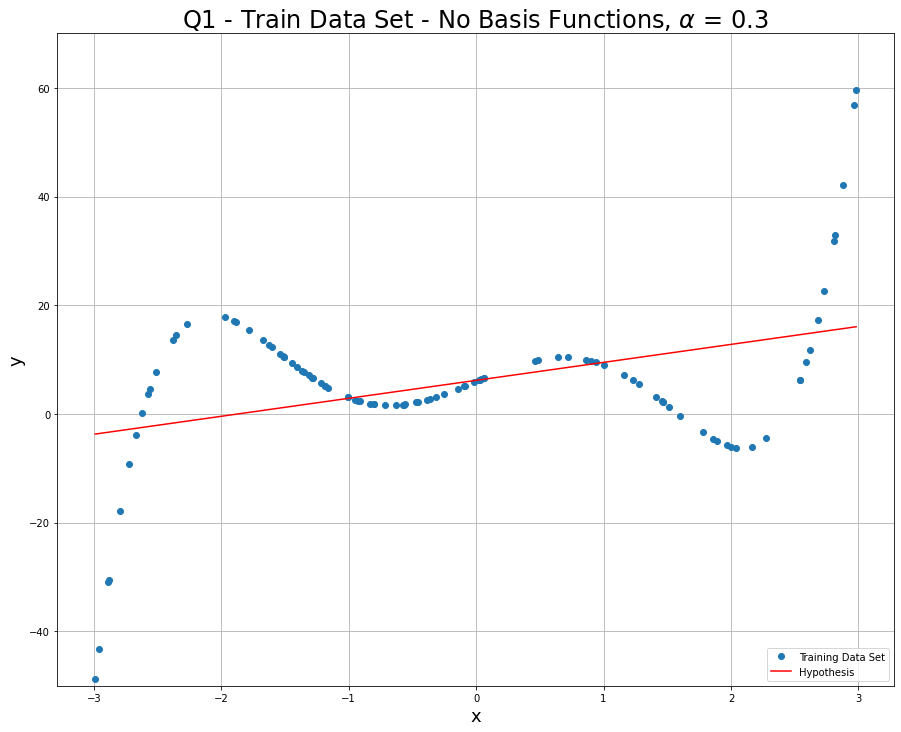

Theta array after training: [[6.19053297 3.30632623]]


In [141]:
#Plot the initial training data and hypothesis function.
plt.figure(0, figsize=[15, 12])
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.title(f'Q1 - Train Data Set - No Basis Functions, ' + r'$\alpha$ = ' + f'{a1.a}', fontsize=24)
plt.ylim(-50, 70)
og, hypth = plt.plot(x_train[:, 1], y_train, 'o', x, h, 'r-')

hypth.set_label('Hypothesis')
og.set_label('Training Data Set')
plt.legend(loc='lower right')
plt.grid()

print(f'Initialzed theta array is: {a1.theta}')

iterations = 100
for k in range(iterations):
        print(f'Current iteration is {k} @ error = {error[-1]}')
        a1.gradientDescent(x_train, y_train)
        x, h = a1.hypothesisDataGeneration(np.min(x_train[:, 1]),np.max(x_train[:,1]), order)
        error.append(a1.costFunction(x_train, y_train))
        epsilon = np.abs(error[-1] - error[-2])
        hypth.set_ydata(h)
        plt.draw()
        if (epsilon < 10e-6):
                print('Convergence threshold met.')
                break

plt.show()

print(f'Theta array after training: {a1.theta}')

The following code utilizes the linear regression model trained via gradient descent as shown above.

RMSE for the test data set is: [1.6796619]


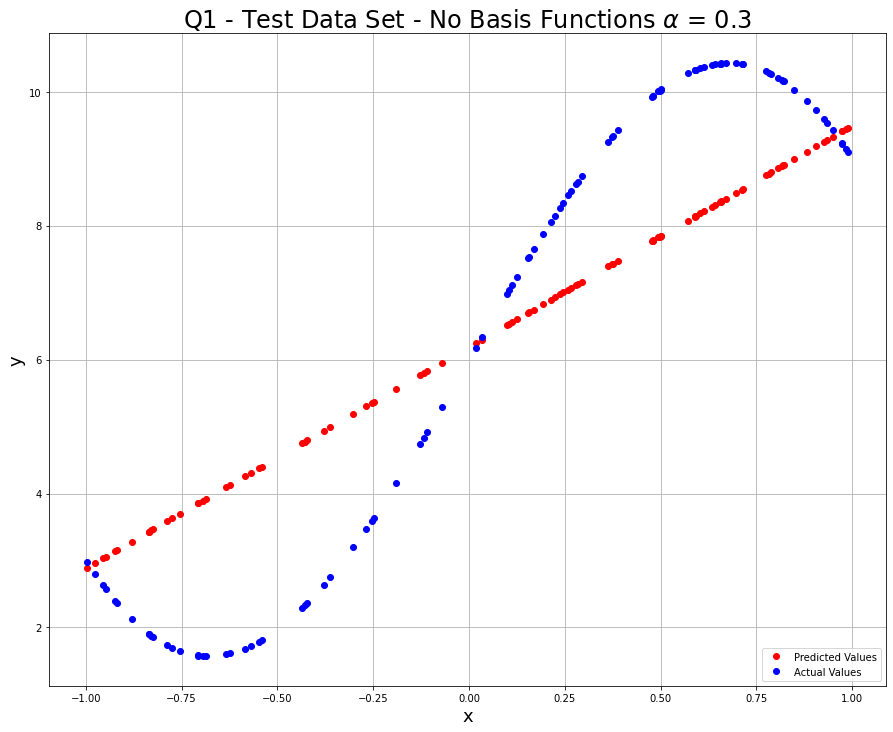

In [142]:
#Testing the model for Question 1
for i in range(2, order+1):
        x_test = a1.polynomialBasis(x_test, order) #Input data with the order desired to be concatenated into the original dataset.
x_test = a1.concatOnes(x_test) #Input data with the order desired to be concatenated into the original dataset.

plt.figure(1, figsize=[15, 12])
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.grid()

plt.title(r'Q1 - Test Data Set - No Basis Functions $\alpha$' + f' = {a1.a}', fontsize=24)

y = []

for i in range(n):
        y.append(a1.hypothesis(x_test[i]))

#Plotting the actual and predicted values based on the hypothesis function found from training.
test, hypth = plt.plot(x_test[:, 1], y, 'ro', x_test[:, 1] , y_test, 'bo')
test.set_label('Predicted Values')
hypth.set_label('Actual Values')
plt.legend(loc='lower right')

#Takikng the Root Mean Squared Error (RMSE)
error = np.sqrt(a1.costFunction(x_test, y_test))
print(f'RMSE for the test data set is: {error}')

The above plot illustrates that the test data and training data are both non-linear in nature. Therefore, the best way to reduce the error shown above is to provide basis functions to add dimensionality to the data. The best approach would be to use the polynomial basis functions to predict data more accurately than just strictly using a linear approach. 

Responses to the questions:

1.   The training and test datasets are both non-linear in nature. Both datasets are polynomials of differing orders. 
2.   The best approach to the datasets given would be to use non-linear basis functions (i.e. polynomial or gaussian) to provide better predictions for the input data to the hypothesis function. 






# Question 2

The following code blocks are used to create the plots and graphics necessary to model question two. 

Initialzed theta array is: [[0.94349445 0.60663727 0.32854695 0.58510611 0.69735293 0.80552073
  0.82519419 0.1554889  0.52639945 0.84771996 0.51992922 0.72888741]]
Theta array after training: [[0.94349445 0.60663727 0.32854695 0.58510611 0.69735293 0.80552073
  0.82519419 0.1554889  0.52639945 0.84771996 0.51992922 0.72888741]]


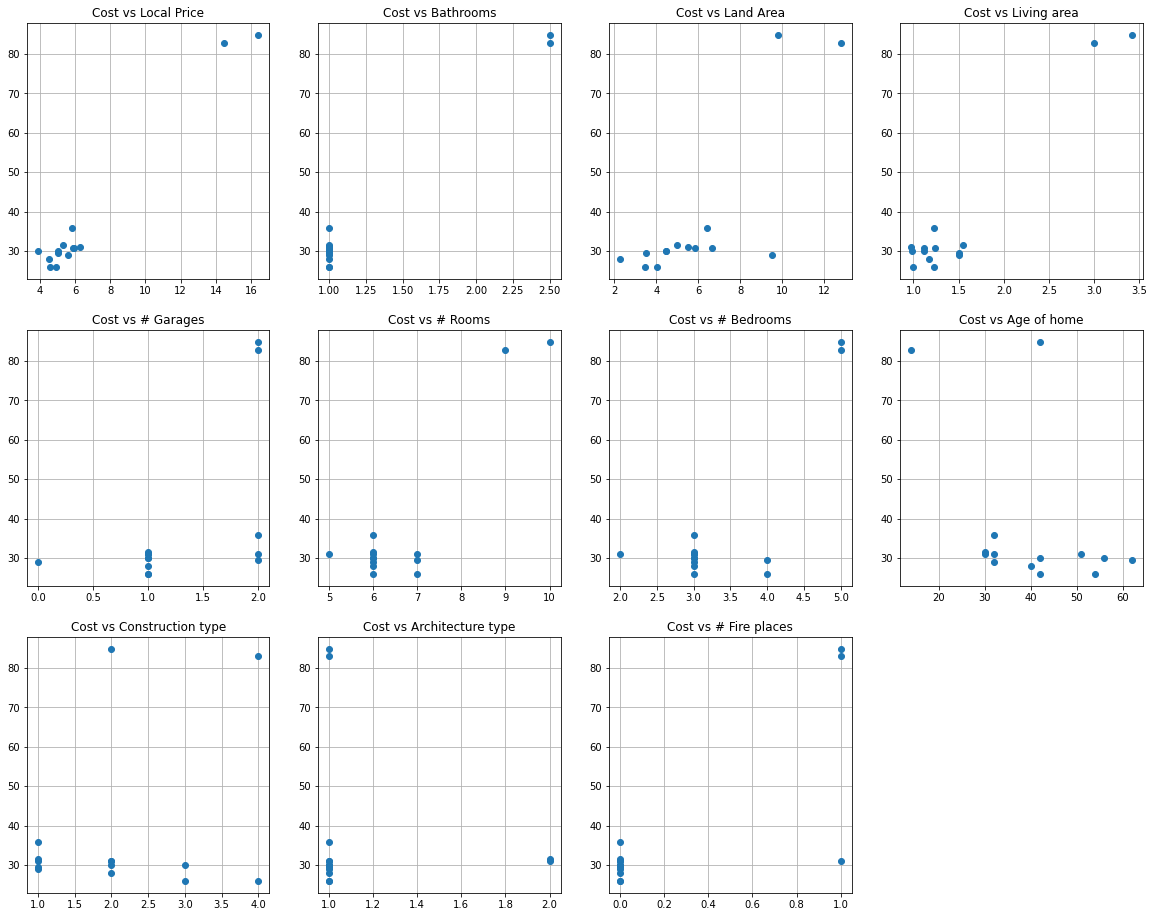

In [143]:
#Updating the data for Question 2 from the CSV file. 
[x_train, y_train, x_test, y_test, header] = a1.csvParse('./ML_Assignment1/Assignment1_Q2_Data.csv')

x_train = a1.concatOnes(x_train) #Place 1's in the first column of the data set. 
x_test = a1.concatOnes(x_test) #Input data with the order desired to be concatenated into the original dataset.

# x_train = a1.featureSelection(x_train, [1,2])
# x_test = a1.featureSelection(x_test, [1,2])
plt.figure(4, figsize=[20, 16])

for i, s in enumerate(header):
        plt.subplot(3, 4, i+1)
        plt.plot(x_train[:, i+1], y_train, 'o')
        plt.title(f'Cost vs {s}')
        plt.grid()

[n, m] = x_train.shape

	#Initialize the Parameters based upon the dimensionality of the training dataset
a1.init_theta(1, m)

print(f'Initialzed theta array is: {a1.theta}')


print(f'Theta array after training: {a1.theta}')

# Question 3

The following code utilizes the local weights method to predict data based upon the data found within the test dataset. 